# Segmenter une trace

Il peut être intéressant de segmenter (ici découper) une trace en plusieurs traces. Cette opération peut se réaliser de plusieurs façons dans la librairie tracklib.


1/ Avec une liste d'index
------------------------------

Tout simplement, vous avez la liste des index des observations qui représentent les limites des différents fragments de la trace.


.. code-block:: python

   idxFragments = [3, 5, 7]
   collection = split(track, source)
   print (collection)



2/ Avec création de marqueurs
-------------------------------

* Etape 1

Vous n'avez pas les bornes pour la segmenter mais vous avez une méthode pour les calculer. Autrement dit, vous avez un critère permettant 
de découper la trace. Comme par exemple, la trace du quickstart qui a été découpée suivant les changements de vitesses. 

Pour cela, il faut tout d'abord créer des points de rupture, ils seront définis par un AF qui aura un ensemble fini de valeurs. 
Une coupure sera effective à chaque seuil passé en paramètre.

Vous pouvez même combiner plusieurs AF pour découper la trace. Par défaut l'opérateur de comparaison est AND mais on peut le changer en OU.
Dans ce cas, l'ensemble des AF sont définis dans un tableau ainsi que leurs seuils.

A l'issu de la création des marqueurs, la trace est toujours conservée, mais une nouvelle AF est ajoutée. 
Elle a comme valeurs 0 sauf pour les ruptures, ce sera 1.


#  Segmentation
segmentation.segmentation(trace, ["absdv"], "speed_decoup", [1.5])


* Etape 2

Il reste à découper la trace suivant le marker créé précédemment. Pour cela, il faut appeler la même fonction **split** mais en spécifiant cette fois-ci
non pas une liste des index, mais le ou les AF


Splits track according to af name (considered as a marker) 


Return: No track if no segmentation, otherwise a TrackCollection object





## Import de la librairie tracklib

This task is only useful for the online notebook

In [1]:
import matplotlib.pyplot as plt

import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Chargement de la trace

<AxesSubplot: title={'center': 'Track 903959'}, xlabel='E (m)', ylabel='N (m)'>

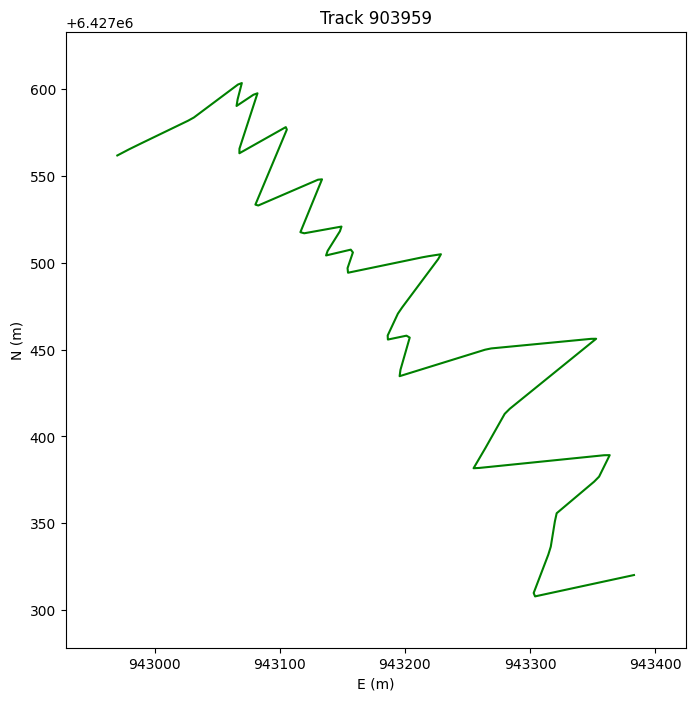

In [2]:
from tracklib.io.TrackReader import TrackReader
import tracklib.algo.Interpolation as interpolation
import tracklib.plot.Plot as Plot

csvpath = '../../../data/lacet/ecrins.csv'
tracks = TrackReader.readFromWkt(csvpath, 0, 1, 2, ",", 1, "ENUCoords", None, True)

trace = tracks["903959","%"][0]
trace.resample(5, interpolation.MODE_SPATIAL)

traceE = trace.extract(450, 700)

plt.figure(figsize = (8,8))
traceE.plot(append = True, sym='g-', label='original extract track 3')

## On calcule les AF